<a href="https://colab.research.google.com/github/sakalaharshith/AI_coursework/blob/main/AI_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io 
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

(20000, 60)
Class=4, n=3301 (16.505%)
Class=3, n=4481 (22.405%)
Class=5, n=2183 (10.915%)
Class=1, n=4876 (24.380%)
Class=2, n=5159 (25.795%)


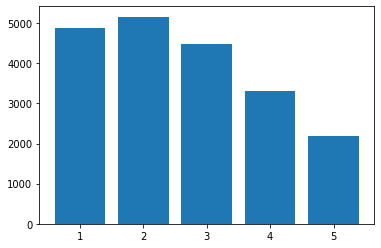

In [ ]:
# Data Loading and Checking Data for Imbalance
data=scipy.io.loadmat('TrainingData.mat')
Independent=data['Train_X']
dependent=data['Train_Y']
print(np.shape(Independent))
data=pd.DataFrame(Independent)
data['Y_values']=dependent
counter = Counter(data['Y_values'])
for k,v in counter.items():
    per = v / len(data['Y_values']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()


              0         1         2         3         4         5          6  \
0     -0.082782  1.063802 -0.245269  0.464303  1.010393  0.721135   6.898478   
1      0.183957 -0.933155 -0.095755  0.219578  0.582597  0.268425   1.542861   
2      0.006919  1.085819 -0.103462  0.674103  1.021658  0.654780  14.541258   
3     -0.135333  1.041393 -0.215466  0.454379  1.221680  0.331059   6.606738   
4      0.356416  0.063653 -0.922205  0.050348  0.009169  0.131760   0.081119   
...         ...       ...       ...       ...       ...       ...        ...   
25790 -0.002345  0.802586 -0.081020  0.377783  1.115105  0.349878   4.567443   
25791 -0.315049  0.944392 -0.346218  0.557835  1.492558  0.805216  10.072201   
25792 -0.061725  0.932807 -0.234090  0.277771  1.504773  0.620824   2.541571   
25793 -0.053248  0.966341 -0.019741  0.238500  0.816738  0.166122   1.832729   
25794  0.018754  0.807170 -0.089009  0.384570  1.023127  0.586826   4.734654   

              7         8          9  .

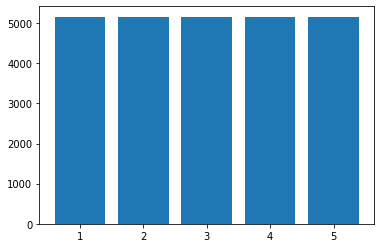

In [ ]:
# Balancing Data using SMOTE(over sampling)
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(Independent, dependent)
dataframe2=pd.DataFrame(x_smote)
dataframe2['Y_values']=pd.DataFrame(y_smote)
print(dataframe2)
dataframe2.isnull().sum()
print(dataframe2[dataframe2['Y_values']==3].count())
counter = Counter(dataframe2['Y_values'])
for k,v in counter.items():
    per = v / len(dataframe2['Y_values']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
#checking for the presence of null values
print(dataframe2.isnull().sum()) 

0           0
1           0
2           0
3           0
4           0
           ..
56          0
57          0
58          0
59          0
Y_values    0
Length: 61, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

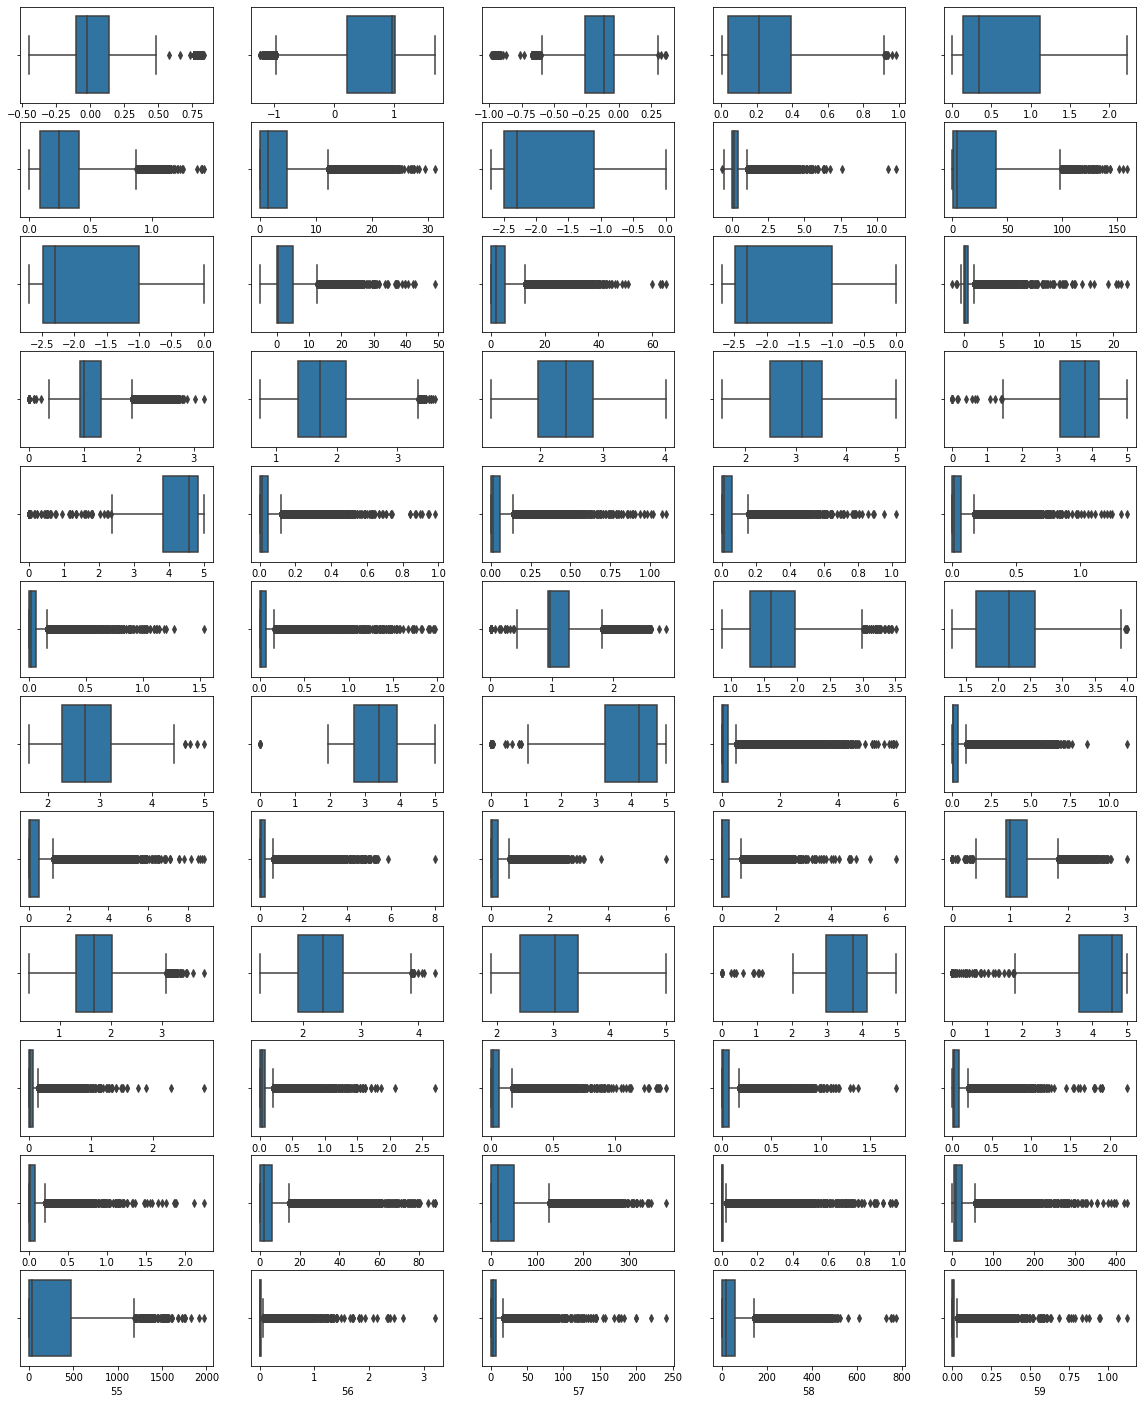

                  0             1             2             3             4  \
count  25795.000000  25795.000000  25795.000000  25795.000000  25795.000000   
mean       0.037293      0.582774     -0.221384      0.236650      0.591917   
std        0.219436      0.707412      0.304180      0.206175      0.540636   
min       -0.453039     -1.244913     -0.989318      0.001369      0.002445   
25%       -0.103105      0.212035     -0.258271      0.040445      0.141113   
50%       -0.025623      0.958716     -0.114461      0.209965      0.341448   
75%        0.135542      1.007243     -0.034417      0.391063      1.115853   
max        0.833731      1.669893      0.360210      0.987442      2.232413   

                  5             6             7             8             9  \
count  25795.000000  25795.000000  25795.000000  25795.000000  25795.000000   
mean       0.273751      3.154672     -1.983087      0.348708     20.565183   
std        0.236915      4.251609      0.701181    

In [ ]:
# Checking for the presence of Outliers
import seaborn as sns

fig,ax = plt.subplots(nrows = 12, ncols = 5, figsize = (20,25)) 

for variable, subplot in zip(dataframe2.columns, ax.flatten()):
    sns.boxplot(dataframe2[variable], ax = subplot) # box plots are plotted to check the presence of outliers 
plt.show()

print(dataframe2.describe())

In [ ]:
# Data Standardisation
print(dataframe2.describe())
standardisation=StandardScaler()
dataframe1=standardisation.fit_transform(dataframe2.iloc[:,0:60])
dataframe=pd.DataFrame(dataframe1)
print(dataframe.describe())
dataframe['Y_values']=dataframe2['Y_values']
print(dataframe.isnull().sum())


                  0             1             2             3             4  \
count  25795.000000  25795.000000  25795.000000  25795.000000  25795.000000   
mean       0.037293      0.582774     -0.221384      0.236650      0.591917   
std        0.219436      0.707412      0.304180      0.206175      0.540636   
min       -0.453039     -1.244913     -0.989318      0.001369      0.002445   
25%       -0.103105      0.212035     -0.258271      0.040445      0.141113   
50%       -0.025623      0.958716     -0.114461      0.209965      0.341448   
75%        0.135542      1.007243     -0.034417      0.391063      1.115853   
max        0.833731      1.669893      0.360210      0.987442      2.232413   

                  5             6             7             8             9  \
count  25795.000000  25795.000000  25795.000000  25795.000000  25795.000000   
mean       0.273751      3.154672     -1.983087      0.348708     20.565183   
std        0.236915      4.251609      0.701181    

In [ ]:
# Data Splitting into Train and Test
def dataset_splitting(list_of_features):
  x_train,x_test,y_train,y_test=train_test_split(dataframe.iloc[:,list_of_features],dataframe.iloc[:,60],test_size=0.2)
  return [x_train,x_test,y_train,y_test] 


In [ ]:
# Displaying Confusion matrix
def confusionmatrix(cf_matrix):
  import seaborn as sns
  import matplotlib.pyplot as plt

  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted ')
  ax.set_ylabel('Actual  ');

  
  ax.xaxis.set_ticklabels(['1','2', '3','4','5'])
  ax.yaxis.set_ticklabels(['1','2', '3','4','5'])

  
  plt.show()


In [ ]:
# measuring metrics like sensitivity, specificity etc... from confusion matrix
def confusionmatrix_metrics(cf_matrix,y_test,name):
  Sensitivity_all_values=[0,0,0,0,0]
  Specificity_all_values=[0,0,0,0,0]
  Precision_all_values=[0,0,0,0,0]
  print("Class 1:")
  
  TP_class1=cf_matrix[0][0]
  FN_class1=cf_matrix[0][1]+cf_matrix[0][2]+cf_matrix[0][3]+cf_matrix[0][4]
  FP_class1=cf_matrix[1][0]+cf_matrix[2][0]+cf_matrix[3][0]+cf_matrix[4][0]
  TN_class1=len(y_test)-(TP_class1+FN_class1+FP_class1)
  Sensitivity_all_values[0]=(TP_class1)/(TP_class1+FN_class1)
  Specificity_all_values[0]=(TN_class1)/(TN_class1+FP_class1)
  Precision_all_values[0]=(TP_class1)/(TP_class1+FP_class1)
  print("Sensitivity:",(TP_class1)/(TP_class1+FN_class1))
  print("Specificity:",(TN_class1)/(TN_class1+FP_class1))
  print("precision:",(TP_class1)/(TP_class1+FP_class1))

  print("Class 2:")
  
  TP_class2=cf_matrix[1][1]
  FN_class2=cf_matrix[1][0]+cf_matrix[1][2]+cf_matrix[1][3]+cf_matrix[1][4]
  FP_class2=cf_matrix[0][1]+cf_matrix[2][1]+cf_matrix[3][1]+cf_matrix[4][1]
  TN_class2=len(y_test)-(TP_class2+FN_class2+FP_class2)
  Sensitivity_all_values[1]=(TP_class2)/(TP_class2+FN_class2)
  Specificity_all_values[1]=(TN_class2)/(TN_class2+FP_class2)
  Precision_all_values[1]=(TP_class2)/(TP_class2+FP_class2)
  print("Sensitivity:",(TP_class2)/(TP_class2+FN_class2))
  print("Specificity:",(TN_class2)/(TN_class2+FP_class2))
  print("precision:",(TP_class2)/(TP_class2+FP_class2))

  print("Class 3:")
  TP_class3=cf_matrix[2][2]
  FN_class3=cf_matrix[2][0]+cf_matrix[2][1]+cf_matrix[2][3]+cf_matrix[2][4]
  FP_class3=cf_matrix[0][2]+cf_matrix[1][2]+cf_matrix[3][2]+cf_matrix[4][2]
  TN_class3=len(y_test)-(TP_class3+FN_class3+FP_class3)
  Sensitivity_all_values[2]=(TP_class3)/(TP_class3+FN_class3)
  Specificity_all_values[2]=(TN_class3)/(TN_class3+FP_class3)
  Precision_all_values[2]=(TP_class3)/(TP_class3+FP_class3)
  print("Sensitivity:",(TP_class3)/(TP_class3+FN_class3))
  print("Specificity:",(TN_class3)/(TN_class3+FP_class3))
  print("precision:",(TP_class3)/(TP_class3+FP_class3))

  print("Class 4:")
  TP_class4=cf_matrix[3][3]
  FN_class4=cf_matrix[3][0]+cf_matrix[3][1]+cf_matrix[3][2]+cf_matrix[3][4]
  FP_class4=cf_matrix[0][3]+cf_matrix[1][3]+cf_matrix[2][3]+cf_matrix[4][3]
  TN_class4=len(y_test)-(TP_class4+FN_class4+FP_class4)
  Sensitivity_all_values[3]=(TP_class4)/(TP_class4+FN_class4)
  Specificity_all_values[3]=(TN_class4)/(TN_class4+FP_class4)
  Precision_all_values[3]=(TP_class4)/(TP_class4+FP_class4)
  print("Sensitivity:",(TP_class4)/(TP_class4+FN_class4))
  print("Specificity:",(TN_class4)/(TN_class4+FP_class4))
  print("precision:",(TP_class4)/(TP_class4+FP_class4))

  print("Class 5:")
  TP_class5=cf_matrix[4][4]
  FN_class5=cf_matrix[4][0]+cf_matrix[4][1]+cf_matrix[4][2]+cf_matrix[4][3]
  FP_class5=cf_matrix[0][4]+cf_matrix[1][4]+cf_matrix[2][4]+cf_matrix[3][4]
  TN_class5=len(y_test)-(TP_class5+FN_class5+FP_class5)
  Sensitivity_all_values[4]=(TP_class5)/(TP_class5+FN_class5)
  Specificity_all_values[4]=(TN_class5)/(TN_class5+FP_class5)
  Precision_all_values[4]=(TP_class5)/(TP_class5+FP_class5)
  print("Sensitivity:",(TP_class5)/(TP_class5+FN_class5))
  print("Specificity:",(TN_class5)/(TN_class5+FP_class5))
  print("precision:",(TP_class5)/(TP_class5+FP_class5))

  
  x = np.arange(5)
  width = 0.2
  plt.bar(x-0.2, np.array(Sensitivity_all_values), width, color='cyan')
  plt.bar(x, np.array(Specificity_all_values), width, color='orange')
  plt.bar(x+0.2, np.array(Precision_all_values), width, color='green')
  plt.xticks(x, ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
  plt.xlabel("Confusion Matrix metrics")
  plt.ylabel("Metric Measurement(in decimals)")
  plt.legend(["Sensitivity", "Specificity", "Precision"])
  plt.title(name)
  plt.show()


In [ ]:
# KNN implementation
list_classifiers=[0,1,2] # just declaring classifier variable global so it would be useful to use it outside
pca_list_classifiers=[0,1,2]
from numpy.ma.core import size
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
def knn_confusionmatrix(x_train,x_test,y_train,y_test,feature_name,check):
  classifier_knn = KNeighborsClassifier(n_neighbors=141)
  classifier_knn.fit(x_train, y_train)
  if check==1:
    list_classifiers[0]=classifier_knn
  if check==0:
    pca_list_classifiers[0]=classifier_knn
  y_pred = classifier_knn.predict(x_test)
  print(y_pred,"     ",y_test)
  accuracy=round(sum(y_pred==y_test)/len(y_test),3)
  print("Model Accuracy:",sum(y_pred==y_test)/len(y_test))
  cross_validation_score=cross_val_score(classifier_knn,dataframe.iloc[:,0:60],dataframe['Y_values'],cv=5)
  print("accuracy scores for 5 validations",cross_validation_score.mean())

  cf_matrix = confusion_matrix(y_test, y_pred)
  print(cf_matrix)
  name="KNN"+"("+feature_name+")"
  confusionmatrix_metrics(cf_matrix,y_test,name)
  confusionmatrix(cf_matrix)
  return accuracy

In [ ]:
# Decision Tree implementation

from sklearn import tree
def tree_confusionmatrix(x_train,x_test,y_train,y_test,feature_name,check):
  classifier_decisiontrees = tree.DecisionTreeClassifier()
  classifier_decisiontrees.fit(x_train, y_train)
  if check==1:
    list_classifiers[1]=classifier_decisiontrees
  if check==0:
    pca_list_classifiers[1]=classifier_decisiontrees
  predict=classifier_decisiontrees.predict(x_test)
  accuracy=round(sum(predict==y_test)/len(y_test),3)
  print("Model Accuracy:",sum(predict==y_test)/len(y_test))
  cross_validation_score=cross_val_score(classifier_decisiontrees,dataframe.iloc[:,0:60],dataframe['Y_values'],cv=5)
  print("accuracy scores for 5 validations",cross_validation_score.mean())
  cf_matrix = confusion_matrix(y_test, predict)
  print(cf_matrix)
  name="Decision Trees"+"("+feature_name+")"
  confusionmatrix_metrics(cf_matrix,y_test,name)
  confusionmatrix(cf_matrix)
  return accuracy


In [ ]:
# SVM implementation

from sklearn.svm import SVC  
def SVM_confusionmatrix(x_train,x_test,y_train,y_test,feature_name,check):
  classifier_svc = SVC(kernel='linear') 
  classifier_svc.fit(x_train, y_train)
  if check==1:
    list_classifiers[2]=classifier_svc
  if check==0:
    pca_list_classifiers[2]=classifier_svc

  predict=classifier_svc.predict(x_test)
  accuracy=round(sum(predict==y_test)/len(y_test),3)
  print("Model Accuracy:",sum(predict==y_test)/len(y_test))
  cross_validation_score=cross_val_score(classifier_svc,dataframe.iloc[:,0:60],dataframe['Y_values'],cv=5)
  print("accuracy scores for 5 validations",cross_validation_score.mean())
  cf_matrix = confusion_matrix(y_test, predict)
  print(cf_matrix)
  name="SVM"+"("+feature_name+")"
  confusionmatrix_metrics(cf_matrix,y_test,name)
  confusionmatrix(cf_matrix)
  return accuracy


  

X_kbest_features [[ 1.10419545  0.77405726  1.88841371 ...  0.20710193  0.46099886
   2.11193215]
 [-0.08280592 -0.01724064 -0.02248018 ... -0.01660661 -0.388356
  -0.33269507]
 [ 2.12179416  0.79489548  1.60832556 ...  0.18266497  0.49850374
   1.38375184]
 ...
 [ 0.19945021  1.68851568  1.46499751 ...  0.81570419  1.98597114
   1.36082122]
 [ 0.00897297  0.41585315 -0.45429977 ...  0.08723526  0.02307569
  -0.49405089]
 [ 0.7174602   0.797612    1.32149456 ... -0.09194363  0.52811551
   1.0692671 ]]
Selected Features [3, 4, 5, 6, 9, 11, 12, 33, 34, 35, 36, 37, 38, 48, 49, 50, 52, 54, 55, 58]
[False False False  True  True  True  True False False  True False  True
  True False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True False False False False False False False False False
  True  True  True False  True False  True  True False False  True]
                        KNN            

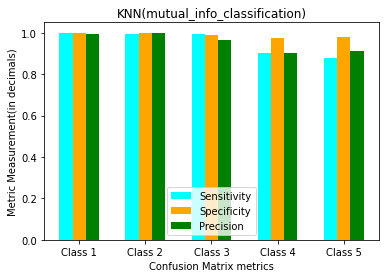

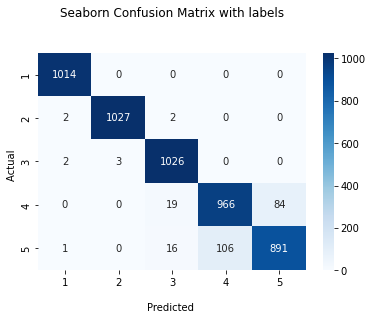

                        DecisionTrees                                  
Model Accuracy: 0.9792595464237255
accuracy scores for 5 validations 0.983989145183175
[[1013    1    0    0    0]
 [   0 1028    3    0    0]
 [   0    0 1026    3    2]
 [   0    0    5 1021   43]
 [   0    0    0   50  964]]
Class 1:
Sensitivity: 0.9990138067061144
Specificity: 1.0
precision: 1.0
Class 2:
Sensitivity: 0.997090203685742
Specificity: 0.9997577519379846
precision: 0.9990281827016521
Class 3:
Sensitivity: 0.9951503394762367
Specificity: 0.998062015503876
precision: 0.9922630560928434
Class 4:
Sensitivity: 0.9550982226379794
Specificity: 0.9870415647921761
precision: 0.9506517690875232
Class 5:
Sensitivity: 0.9506903353057199
Specificity: 0.9891435464414958
precision: 0.9554013875123885


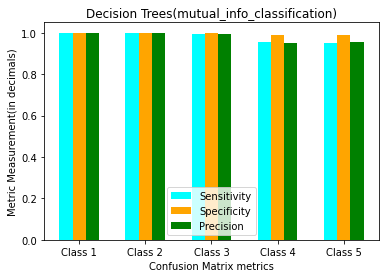

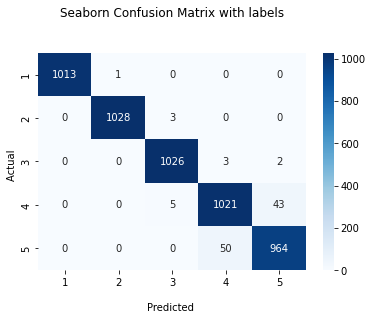

                        Support Vector Machines                              
Model Accuracy: 0.9639465012599341
accuracy scores for 5 validations 0.9818181818181818
[[1014    0    0    0    0]
 [   0 1027    4    0    0]
 [   0    4 1027    0    0]
 [   0    0    9  977   83]
 [   0    1    0   85  928]]
Class 1:
Sensitivity: 1.0
Specificity: 1.0
precision: 1.0
Class 2:
Sensitivity: 0.9961202715809894
Specificity: 0.9987887596899225
precision: 0.9951550387596899
Class 3:
Sensitivity: 0.9961202715809894
Specificity: 0.9968507751937985
precision: 0.9875
Class 4:
Sensitivity: 0.9139382600561272
Specificity: 0.9792176039119804
precision: 0.9199623352165726
Class 5:
Sensitivity: 0.9151873767258383
Specificity: 0.9799758745476478
precision: 0.9179030662710188


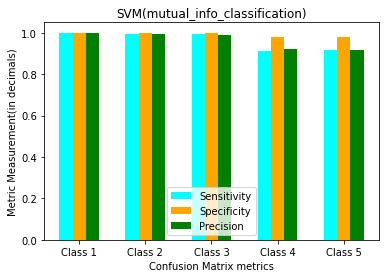

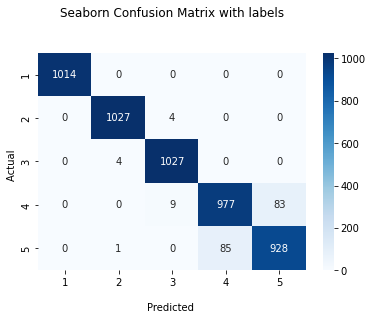

In [ ]:
#Feature Selection- mutual information
mutual_info_accuracies=[0,1,2]
mutual_info_features = SelectKBest(mutual_info_classif, k = 20) 
X_kbest_features = mutual_info_features.fit_transform(dataframe.iloc[:,0:59], dataframe.iloc[:,60])
print("X_kbest_features",X_kbest_features)
mask=mutual_info_features.get_support()
new_feature=[]
for bool,feature in zip(mask,dataframe.iloc[:,0:59].columns):
  if bool:
    new_feature.append(feature)
list_top20_features=new_feature
print("Selected Features",list_top20_features)
print(mask)
splitted_dataset=dataset_splitting(list_top20_features)

print("                        KNN                                  ")
mutual_info_accuracies[0]=knn_confusionmatrix(splitted_dataset[0],splitted_dataset[1],splitted_dataset[2],splitted_dataset[3],"mutual_info_classification",1)
print("                        DecisionTrees                                  ")
mutual_info_accuracies[1]=tree_confusionmatrix(splitted_dataset[0],splitted_dataset[1],splitted_dataset[2],splitted_dataset[3],"mutual_info_classification",1)

print("                        Support Vector Machines                              ")
mutual_info_accuracies[2]=SVM_confusionmatrix(splitted_dataset[0],splitted_dataset[1],splitted_dataset[2],splitted_dataset[3],"mutual_info_classification",1)


principal component analysis PCA(n_components=15)
principal component analysis [0.43201231 0.08126469 0.05437592 0.04917051 0.03910433 0.02761493
 0.0258929  0.01999929 0.01770511 0.01653257 0.01594012 0.0145865
 0.01384249 0.01342994 0.01205164]
                                KNN                                                          
[5 2 2 ... 4 3 4]       24018    5
16260    2
6627     2
20265    1
22009    4
        ..
8747     4
16016    4
6023     4
20373    3
21108    4
Name: Y_values, Length: 5159, dtype: uint8
Model Accuracy: 0.9604574529947665
accuracy scores for 5 validations 0.9633649932157395
[[1029    4    4    0    0]
 [   0  993   22    0    0]
 [   0    5  994    0    0]
 [   0    0    9  964   64]
 [   0    0   18   78  975]]
Class 1:
Sensitivity: 0.9922854387656702
Specificity: 1.0
precision: 1.0
Class 2:
Sensitivity: 0.9783251231527094
Specificity: 0.9978281853281853
precision: 0.9910179640718563
Class 3:
Sensitivity: 0.994994994994995
Specificity: 0.98725961538

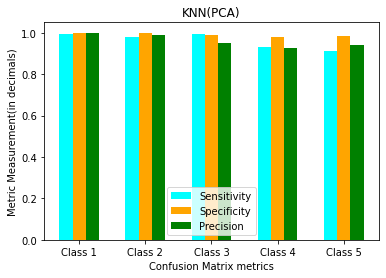

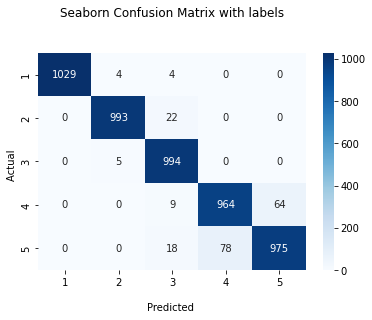

                            DecisionTrees                                  
Model Accuracy: 0.9645280093041287
accuracy scores for 5 validations 0.9841442139949603
[[1032    2    3    0    0]
 [   3 1003    9    0    0]
 [   2    6  985    3    3]
 [   0    0    4  962   71]
 [   0    2    7   68  994]]
Class 1:
Sensitivity: 0.9951783992285439
Specificity: 0.9987869966035905
precision: 0.9951783992285439
Class 2:
Sensitivity: 0.9881773399014778
Specificity: 0.9975868725868726
precision: 0.9901283316880553
Class 3:
Sensitivity: 0.985985985985986
Specificity: 0.9944711538461538
precision: 0.9771825396825397
Class 4:
Sensitivity: 0.9276759884281581
Specificity: 0.982775351770985
precision: 0.9312681510164569
Class 5:
Sensitivity: 0.9281045751633987
Specificity: 0.9818982387475538
precision: 0.9307116104868914


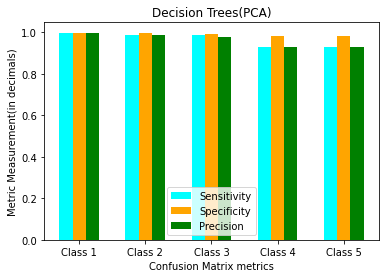

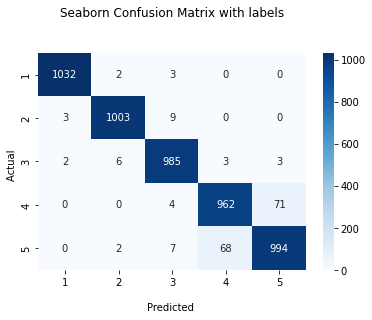

                          Support Vector Machines                              
Model Accuracy: 0.9616204690831557
accuracy scores for 5 validations 0.9818181818181818
[[1036    1    0    0    0]
 [   0 1014    1    0    0]
 [   0    3  996    0    0]
 [   0    0    4  938   95]
 [   0    3    4   87  977]]
Class 1:
Sensitivity: 0.9990356798457087
Specificity: 1.0
precision: 1.0
Class 2:
Sensitivity: 0.9990147783251232
Specificity: 0.9983108108108109
precision: 0.9931439764936337
Class 3:
Sensitivity: 0.996996996996997
Specificity: 0.9978365384615384
precision: 0.991044776119403
Class 4:
Sensitivity: 0.9045323047251688
Specificity: 0.9788937409024745
precision: 0.9151219512195122
Class 5:
Sensitivity: 0.9122315592903828
Specificity: 0.976761252446184
precision: 0.9113805970149254


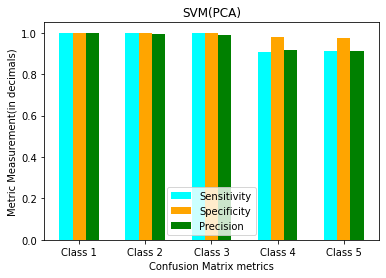

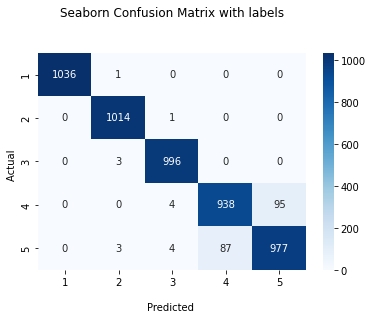

In [ ]:
# Feature Extraction -Principal Component Analysis
from sklearn.decomposition import PCA
pca_accuracies=[0,1,2]
pca = PCA(n_components=15)
print("principal component analysis",pca)
pca = pca.fit(dataframe.iloc[:,:60])
principalComponents=pca.transform(dataframe.iloc[:,:60])
print("principal component analysis",pca.explained_variance_ratio_)
principal_data_frame = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])
x_train,x_test,y_train,y_test=train_test_split(principal_data_frame,dataframe.iloc[:,60],test_size=0.2)
print("                                KNN                                                          ")
pca_accuracies[0]=knn_confusionmatrix(x_train,x_test,y_train,y_test,"PCA",0)
print("                            DecisionTrees                                  ")
pca_accuracies[1]=tree_confusionmatrix(x_train,x_test,y_train,y_test,"PCA",0)

print("                          Support Vector Machines                              ")
pca_accuracies[2]=SVM_confusionmatrix(x_train,x_test,y_train,y_test,"PCA",0)



  


Comparison of accuracies among different machine learning algorithms using mutual_information feature selection
[0.954 0.979 0.964]


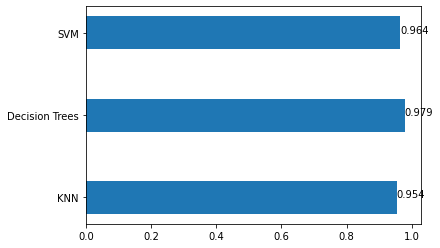

In [ ]:
print("Comparison of accuracies among different machine learning algorithms using mutual_information feature selection")
x = np.arange(3)
y=np.array(mutual_info_accuracies)
width = 0.40
print(y)
plt.barh(x, y, width)
plt.yticks(x, ['KNN','Decision Trees','SVM'])
plt.text(y[0], 0,str(y[0]))
plt.text(y[1],1,str(y[1]))
plt.text(y[2],2,str(y[2]))
 
plt.show()


Comparison of accuracies among different machine learning algorithms using Principal Component Analysis
[0.96  0.965 0.962]


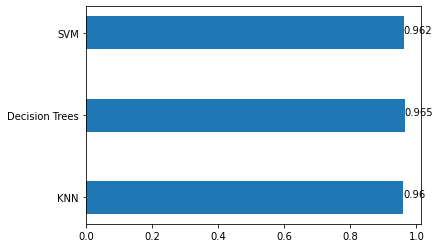

In [ ]:
print("Comparison of accuracies among different machine learning algorithms using Principal Component Analysis")
x = np.arange(3)
y=np.array(pca_accuracies)
width = 0.40
print(y)
plt.barh(x, y, width)
plt.yticks(x, ['KNN','Decision Trees','SVM'])
plt.text(y[0], 0,str(y[0]))
plt.text(y[1],1,str(y[1]))
plt.text(y[2],2,str(y[2]))
 
plt.show()

In [ ]:
# Generating output for test data using feature selection
#testing_data=scipy.io.loadmat('TestData.mat')
#testing_data_input=testing_data['Test_X']

#testing_data_input=pd.DataFrame(testing_data_input)
#standardisation=StandardScaler()
#testing_data=standardisation.fit_transform(testing_data_input.iloc[:,0:60])
#test_dataframe=pd.DataFrame(testing_data)


#test_output_knn= list_classifiers[0].predict(test_dataframe.iloc[:,list_top20_features])
#test_output_decisiontrees=list_classifiers[1].predict(test_dataframe.iloc[:,list_top20_features])
#test_output_svc=list_classifiers[2].predict(test_dataframe.iloc[:,list_top20_features])
#test_output_knn=pd.DataFrame(test_output_knn)
#test_output_decisiontrees=pd.DataFrame(test_output_decisiontrees)
#test_output_svc=pd.DataFrame(test_output_svc)
#test_output_knn.to_csv('test_data_knn.csv', index=False) 
#test_output_decisiontrees.to_csv('test_data_decisiontrees.csv',index=False)
#test_output_svc.to_csv('test_data_svc.csv',index=False) 


In [ ]:
# Generating output for test data using PCA
#pca_test_output_knn= pca_list_classifiers[0].predict(pca.transform(testing_data_input))
#pca_test_output_decisiontrees=pca_list_classifiers[1].predict(pca.transform(testing_data_input))
#pca_test_output_svc=pca_list_classifiers[2].predict(pca.transform(testing_data_input))
#pca_test_output_knn=pd.DataFrame(pca_test_output_knn)
#pca_test_output_decisiontrees=pd.DataFrame(pca_test_output_decisiontrees)
#pca_test_output_svc=pd.DataFrame(pca_test_output_svc)
#pca_test_output_knn.to_csv('pca_test_data_knn.csv', index=False) 
#pca_test_output_decisiontrees.to_csv('pca_test_data_decisiontrees.csv',index=False)
#pca_test_output_svc.to_csv('pca_test_data_svc.csv',index=False) 